In [0]:
# dependencies
import os
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

input_file = "dbfs:/fall_2023_users/mb171/final_project/compressed/perf_98.snappy.parquet"

In [0]:
# load and verify the data is good
perf = spark.read.parquet(input_file)
print(f"{'{:,}'.format(perf.count())} records of performance data collected.")
display(perf)
perf.printSchema()

216,499 records of performance data collected.


VM_instance window P95_CPU usage [%] P95_Memory usage [%] P95_Disk read throughput [KB/s] P95_Disk write throughput [KB/s] P95_Network received throughput [KB/s] P95_Network transmitted throughput [KB/s] 795 List(2013-08-13T04:00:00Z, 2013-08-13T08:00:00Z) 7.1 29.199905395507812 0.9333333333333333 4.866666666666666 1.8666666666666667 47.53333333333333 795 List(2013-08-13T08:00:00Z, 2013-08-13T12:00:00Z) 4.233333333333333 32.533251444498696 80.13333333333334 9.4 0.4 8.2 795 List(2013-08-13T12:00:00Z, 2013-08-13T16:00:00Z) 0.8 16.79993947347005 4.933333333333334 4.533333333333333 0.2 0.7333333333333333 795 List(2013-08-13T16:00:00Z, 2013-08-13T20:00:00Z) 0.5 13.666534423828125 0.07142857142857142 1.8666666666666667 0.06666666666666667 0.07142857142857142 795 List(2013-08-13T20:00:00Z, 2013-08-14T00:00:00Z) 0.7666666666666667 15.133221944173178 2.7333333333333334 2.2142857142857144 0.06666666666666667 0.14285714285714285 795 List(2013-08-14T00:00:00Z, 2013-08-14T04:00:00Z) 1.8333333333333335 19.866549173990887 5.733333333333333 2.533333333333333 0.06666666666666667 0.13333333333333333 795 List(2013-08-14T04:00:00Z, 2013-08-14T08:00:00Z) 0.5 14.799919128417969 3.2666666666666666 1.6 0.06666666666666667 0.13333333333333333 795 List(2013-08-14T08:00:00Z, 2013-08-14T12:00:00Z) 0.5 12.733192443847658 0.2 2.4 0.06666666666666667 0.06666666666666667 795 List(2013-08-14T12:00:00Z, 2013-08-14T16:00:00Z) 3.5 24.66655731201172 9.333333333333334 10.8 0.06666666666666667 0.2 795 List(2013-08-14T16:00:00Z, 2013-08-14T20:00:00Z) 0.6 15.533231099446615 1.8666666666666667 2.2 0.06666666666666667 0.13333333333333333 795 List(2013-08-14T20:00:00Z, 2013-08-15T00:00:00Z) 0.8 18.533236185709637 3.3333333333333335 2.2666666666666666 0.06666666666666667 0.3333333333333333 795 List(2013-08-15T00:00:00Z, 2013-08-15T04:00:00Z) 0.5333333333333333 10.599924723307291 1.4285714285714286 2.2666666666666666 0.06666666666666667 0.06666666666666667 795 List(2013-08-15T04:00:00Z, 2013-08-15T08:00:00Z) 2.6 21.7999267578125 7.066666666666666 6.333333333333333 0.06666666666666667 0.3333333333333333 795 List(2013-08-15T08:00:00Z, 2013-08-15T12:00:00Z) 0.8 19.799880981445312 13.066666666666666 4.066666666666666 0.13333333333333333 0.6666666666666666 795 List(2013-08-15T12:00:00Z, 2013-08-15T16:00:00Z) 5.166666666666666 28.799896240234375 41.733333333333334 4.266666666666667 2.0 29.533333333333335 795 List(2013-08-15T16:00:00Z, 2013-08-15T20:00:00Z) 11.5 31.866594950358074 1.8 4.733333333333333 3.3333333333333335 73.2 795 List(2013-08-15T20:00:00Z, 2013-08-16T00:00:00Z) 3.3846153846153846 19.46654001871745 38.733333333333334 4.933333333333334 0.06666666666666667 0.3333333333333333 795 List(2013-08-16T00:00:00Z, 2013-08-16T04:00:00Z) 0.5 13.466555277506512 0.8666666666666667 2.466666666666667 0.06666666666666667 0.06666666666666667 795 List(2013-08-16T04:00:00Z, 2013-08-16T08:00:00Z) 4.533333333333333 34.599952697753906 3.8 10.533333333333333 1.5333333333333334 35.733333333333334 795 List(2013-08-16T08:00:00Z, 2013-08-16T12:00:00Z) 3.166666666666667 31.199938456217446 124.33333333333333 21.533333333333335 3.857142857142857 23.2 795 List(2013-08-16T12:00:00Z, 2013-08-16T16:00:00Z) 2.8666666666666667 27.466583251953125 38.13333333333333 12.866666666666667 1.0 2.8666666666666667 795 List(2013-08-16T16:00:00Z, 2013-08-16T20:00:00Z) 0.5 13.266588846842447 0.4666666666666667 2.4 0.06666666666666667 0.13333333333333333 795 List(2013-08-16T20:00:00Z, 2013-08-17T00:00:00Z) 1.2666666666666666 20.13324737548828 3.3333333333333335 2.2 0.06666666666666667 0.13333333333333333 795 List(2013-08-17T00:00:00Z, 2013-08-17T04:00:00Z) 0.5 12.399864196777344 0.13333333333333333 2.4 0.06666666666666667 0.13333333333333333 795 List(2013-08-17T04:00:00Z, 2013-08-17T08:00:00Z) 2.733333333333333 17.999839782714844 15.333333333333334 3.1333333333333333 0.0 0.2 795 List(2013-08-17T08:00:00Z, 2013-08-17T12:00:00Z) 0.6333333333333333 16.999855041503906 0.2 2.2666666666666666 0.06666666666666667 1.4 795

root
 |-- VM_instance: string (nullable = true)
 |-- window: struct (nullable = true)
 |    |-- start: timestamp (nullable = true)
 |    |-- end: timestamp (nullable = true)
 |-- P95_CPU usage [%]: double (nullable = true)
 |-- P95_Memory usage [%]: double (nullable = true)
 |-- P95_Disk read throughput [KB/s]: double (nullable = true)
 |-- P95_Disk write throughput [KB/s]: double (nullable = true)
 |-- P95_Network received throughput [KB/s]: double (nullable = true)
 |-- P95_Network transmitted throughput [KB/s]: double (nullable = true)



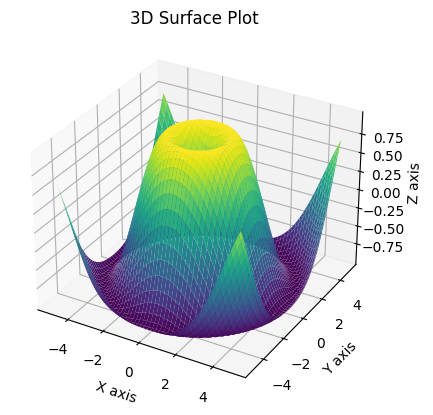

In [0]:


# Creating data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Setting up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Adding labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Display the plot
plt.show()
